<h1 style="text-align:center">执行</h1>
<h1 style="text-align:center">强制执行</h1>
<h1 style="text-align:center">失信被执行</h1>

In [192]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10,10), dpi=80)
import matplotlib.ticker as ticker
import seaborn as sns
from nltk.corpus import stopwords
stopwords = stopwords.words("chinese")
import jieba
import jieba.posseg as pseg
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re


## Pandas, display all row values
pd.set_option('display.max_rows', 99999)

<Figure size 800x800 with 0 Axes>

In [213]:
sh_sx = pd.read_csv("../../data/sh_corp.csv")
sh_sx.sample(15)

,Unnamed: 0,X,shixin_id,iname,code_num,case_code,age,gender,gist_id,business_entity,court,area,reg_date,gist_unit,duty,performance,disrupt_type_name,publish_date
43440,157772,157772,703480369,维诗凯亚休闲俱乐部（上海）有限公司,76399770X,（2018）沪0115执616号,0,COMPANY,（2017）沪0115民初02181号,汪旭,上海市浦东新区人民法院,上海,2018-01-05,上海市浦东新区人民法院,第三人上海澳客维诗休闲健身服务有限公司于本判决生效之日起三十日内搬离上海市浦东新区云山路19...,全部未履行,其他妨碍、抗拒执行,2018-05-30
49672,175134,175134,704505661,上海市普陀区倪仙孙水产行,L38512872,（2018）沪0101执2311号,0,COMPANY,（2017）沪0101民初11257号,倪仙孙,上海市黄浦区人民法院,上海,2018-04-08,上海市黄浦区人民法院,归还借款等。,全部未履行,有履行能力而拒不履行生效法律文书确定义务,2018-09-11
32359,123670,123670,701535982,江苏杉汇肉制品有限公司,MA1MQKJB6,（2017）沪0107执3742号,0,COMPANY,（2016）沪0107民初02169号,施详忠,上海市普陀区人民法院,上海,2017-07-18,上海市普陀区人民法院,金钱给付,全部未履行,有履行能力而拒不履行生效法律文书确定义务,2017-11-07
3592,23969,23969,42623328,上海顾居工贸有限公司,761646375,（2012）闵执字第06836号,0,COMPANY,（2012）闵民二（商）初字第1150号,林永贵,上海市闵行区人民法院,上海,2012-09-16,上海市闵行区人民法院,支付人民币10425234.6元,全部未履行,其他有履行能力而拒不履行生效法律文书确定义务,2014-11-12
35626,134263,134263,702143336,上海黄浦建设发展有限公司,132371807,（2016）沪01执1090号,0,COMPANY,（2015）沪一中民六（商）初字第00464号,钱家琪,上海市第一中级人民法院,上海,2016-10-12,上海市第一中级人民法院,67733800,全部未履行,有履行能力而拒不履行生效法律文书确定义务,2017-12-27
40432,149006,149006,702991699,茵莫（上海）品牌管理有限公司,9131011430****726L,（2018）沪0114执151号,0,COMPANY,（2017）办字第2157号,丁广如,上海市嘉定区人民法院,上海,2018-01-09,区县劳动仲裁委员会,支付2016年3月1日至2016年10月31日期间工资差额人民币20000元,全部未履行,有履行能力而拒不履行生效法律文书确定义务,2018-04-19
19872,80945,80945,125836636,晶联（上海）广告传媒有限公司,590382028,（2016）沪0104执04860号,0,COMPANY,（2016）沪0104民初21522号,曹怡,上海市徐汇区人民法院,上海,2016-10-31,上海市徐汇区人民法院,详卷,全部未履行,其他有履行能力而拒不履行生效法律文书确定义务,2017-02-24
45332,162986,162986,703804145,上海测熙网络科技有限公司,91310118MA****N071,（2018）沪0118执1678号,0,COMPANY,（2017）办字第2420号,陈兵贤,上海市青浦区人民法院,上海,2018-03-14,区县劳动仲裁委员会,支付16010元,全部未履行,有履行能力而拒不履行生效法律文书确定义务,2018-06-29
24038,95050,95050,700150227,上海云升园林绿化有限公司,74562458X,（2017）沪0117执02895号,0,COMPANY,（2016）沪01民终10937号,王惠明,上海市松江区人民法院,上海,2017-05-02,上海市第一中级人民法院,一、原告上海市松江区车墩镇长溇村村民委员会与被告上海云升园林绿化有限公司之间签订的《土地租赁...,全部未履行,有履行能力而拒不履行生效法律文书确定义务,2017-06-16
18713,77567,77567,124763892,上海建晔钢筋工程有限公司,748766057,（2016）沪0115执18795号,0,COMPANY,（2016）沪0115民初21365号,董庆军,上海市浦东新区人民法院,上海,2016-09-12,上海市浦东新区人民法院,货款及滞纳金380160元。\n案件受理费及财产保全费7838元。,全部未履行,其他有履行能力而拒不履行生效法律文书确定义务,2016-11-01


In [194]:
sh_sx.dropna(inplace = True)
sh_sx = sh_sx[sh_sx.duty.str.len() >= 20]

In [195]:
sh_sx.shape

(18804, 18)

In [196]:
sh_sx.describe().T  # with no surprise, other columns are non-numeric; time stamp, or string or categorical.

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18804.0,1.136813e+05,5.065108e+04,2.0,6.678725e+04,122234.5,158571.5,186126.0
X,18804.0,1.136813e+05,5.065108e+04,2.0,6.678725e+04,122234.5,158571.5,186126.0
shixin_id,18804.0,5.044650e+08,2.838729e+08,2905.0,1.183829e+08,701448520.0,703528839.5,705008820.0
age,18804.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0


In [197]:
for i in sh_sx.columns:
    print(f"{i}\n")

Unnamed: 0

X

shixin_id

iname

code_num

case_code

age

gender

gist_id

business_entity

court

area

reg_date

gist_unit

duty

performance

disrupt_type_name

publish_date



# 1. Subset the data to only contains 2015 Jan and beyond

In [198]:
## Converting reg_date&publish_date from `str` to timestamp
sh_sx['reg_date'] = pd.to_datetime(sh_sx.reg_date)
sh_sx['publish_date'] = pd.to_datetime(sh_sx.publish_date)
sh_sx.sample(20)

,Unnamed: 0,X,shixin_id,iname,code_num,case_code,age,gender,gist_id,business_entity,court,area,reg_date,gist_unit,duty,performance,disrupt_type_name,publish_date
37763,141187,141187,702569346,上海唐朝酒店经营管理有限公司,763953715,（2018）沪0114执475号,0,COMPANY,（2016）沪0114民初04969号,海新民,上海市嘉定区人民法院,上海,2018-01-16,上海市嘉定区人民法院,二、被告上海唐朝酒店经营管理有限公司应于本判决生效之日起十日内将坐落于上海市嘉定区宝安公路4...,全部未履行,有履行能力而拒不履行生效法律文书确定义务,2018-03-05
18799,77809,77809,124771679,上海冉也实业有限公司,05120504-9,（2016）沪01执00860号,0,COMPANY,（2015）沪一中民一（民）初字第5号,刘桂霞,上海市第一中级人民法院,上海,2016-08-15,上海市第一中级人民法院,偿还人民币177969056.68元及利息,全部未履行,其他有履行能力而拒不履行生效法律文书确定义务,2017-01-19
11611,55556,55556,109461341,中国黄金集团投资有限公司,710935281,（2015）金执字第01609号,0,COMPANY,（2014）金民二（商）初字第538号,张华,上海市金山区人民法院,上海,2015-05-14,上海市金山区人民法院,一、被告沧州市永盛燃料有限公司应于本判决生效之日起十日内归还原告上海金山惠民村镇银行有限责任...,全部未履行,其他有履行能力而拒不履行生效法律文书确定义务,2015-11-04
34090,129704,129704,701836186,上海钢虹实业有限公司,560137945,（2017）沪0113执6380号,0,COMPANY,（2017）沪0113民初02672号,谢翠芬,上海市宝山区人民法院,上海,2017-11-01,上海市宝山区人民法院,"被告上海钢虹实业有限公司于本判决生效之日起十日内返还原告上海获倾实业有限公司货款11,451...",全部未履行,有履行能力而拒不履行生效法律文书确定义务,2017-12-04
49033,173370,173370,704419713,上海索菲克博大投资管理有限公司,9131011506****5612,（2018）沪0115执11556号,0,COMPANY,（2017）沪0115民初73599号,张仲容,上海市浦东新区人民法院,上海,2018-06-07,上海市浦东新区人民法院,1、强制被申请人支付人民币318012.5元（包括租赁保证金21万元，补偿款105000，案...,全部未履行,有履行能力而拒不履行生效法律文书确定义务,2018-08-30
10067,50265,50265,105904628,上海强自机械厂,599762369,（2015）青执字第04663号,0,COMPANY,（2014）青民二（商）初字第1581号,张自全,上海市青浦区人民法院,上海,2015-07-21,上海市青浦区人民法院,"被告上海强自机械厂应于本判决生效之日起十日内支付原告上海颐创金属材料有限公司货款21,313...",全部未履行,其他有履行能力而拒不履行生效法律文书确定义务,2015-12-23
41138,150972,150972,703081941,上海盛景计算机科技有限公司,775230880,（2018）沪0116执146号,0,COMPANY,（2017）沪0116民初02762号,李江,上海市金山区人民法院,上海,2018-01-03,上海市金山区人民法院,"一、被告上海盛景计算机科技有限公司确认尚欠原告上海雨蔚计算机网络技术有限公司货款人民币79,...",全部未履行,"有履行能力而拒不履行生效法律文书确定义务,其他规避执行",2018-04-26
52996,183556,183556,704824631,林州市顺丰电动车业有限公司,9141058178****0161,（2018）沪0120执6191号,0,COMPANY,（2018）沪0120民初05157号,郭志勇,上海市奉贤区人民法院,上海,2018-10-10,上海市奉贤区人民法院,被告林州市顺丰电动车业有限公司于本判决生效之日起十日内给付原告上海金力泰化工股份有限公司货款...,全部未履行,有履行能力而拒不履行生效法律文书确定义务,2018-10-25
26554,105332,105332,700663747,上海泖峰宾馆,630560088,（2016）沪0116执1324号,0,COMPANY,（2016）沪0116民初00316号,尤自强,上海市金山区人民法院,上海,2016-03-15,上海市金山区人民法院,"一、被告上海泖峰汽车塑料有限公司确认欠原告沈益锋借款人民币本息1,060,000元，应于20...",全部未履行,被执行人无正当理由拒不履行执行和解协议,2017-08-03
34188,129969,129969,701852560,上海精励精密机械有限公司,674554659,（2017）沪0117执5840号,0,COMPANY,（2016）沪0117民初01233号,邱迅飞,上海市松江区人民法院,上海,2017-10-11,上海市松江区人民法院,"要求被执行人支付尚未归还的借款、利息、律师费共计30万元（借款277,500元，利息2,50...",全部未履行,有履行能力而拒不履行生效法律文书确定义务,2017-12-05


In [86]:
sh_sx_2017 = sh_sx[sh_sx["reg_date"].dt.year >= 2015]     # subset to 2015 and beyond

print(f'max date\n {sh_sx_2017.reg_date.max()}\nmin date\n {sh_sx_2017.reg_date.min()}\nmedian date\n {sh_sx_2017.reg_date.median()}')

max date
 2018-11-07 00:00:00
min date
 2015-01-04 00:00:00
median date
 2017-09-18 00:00:00


<AxesSubplot:xlabel='reg_date'>

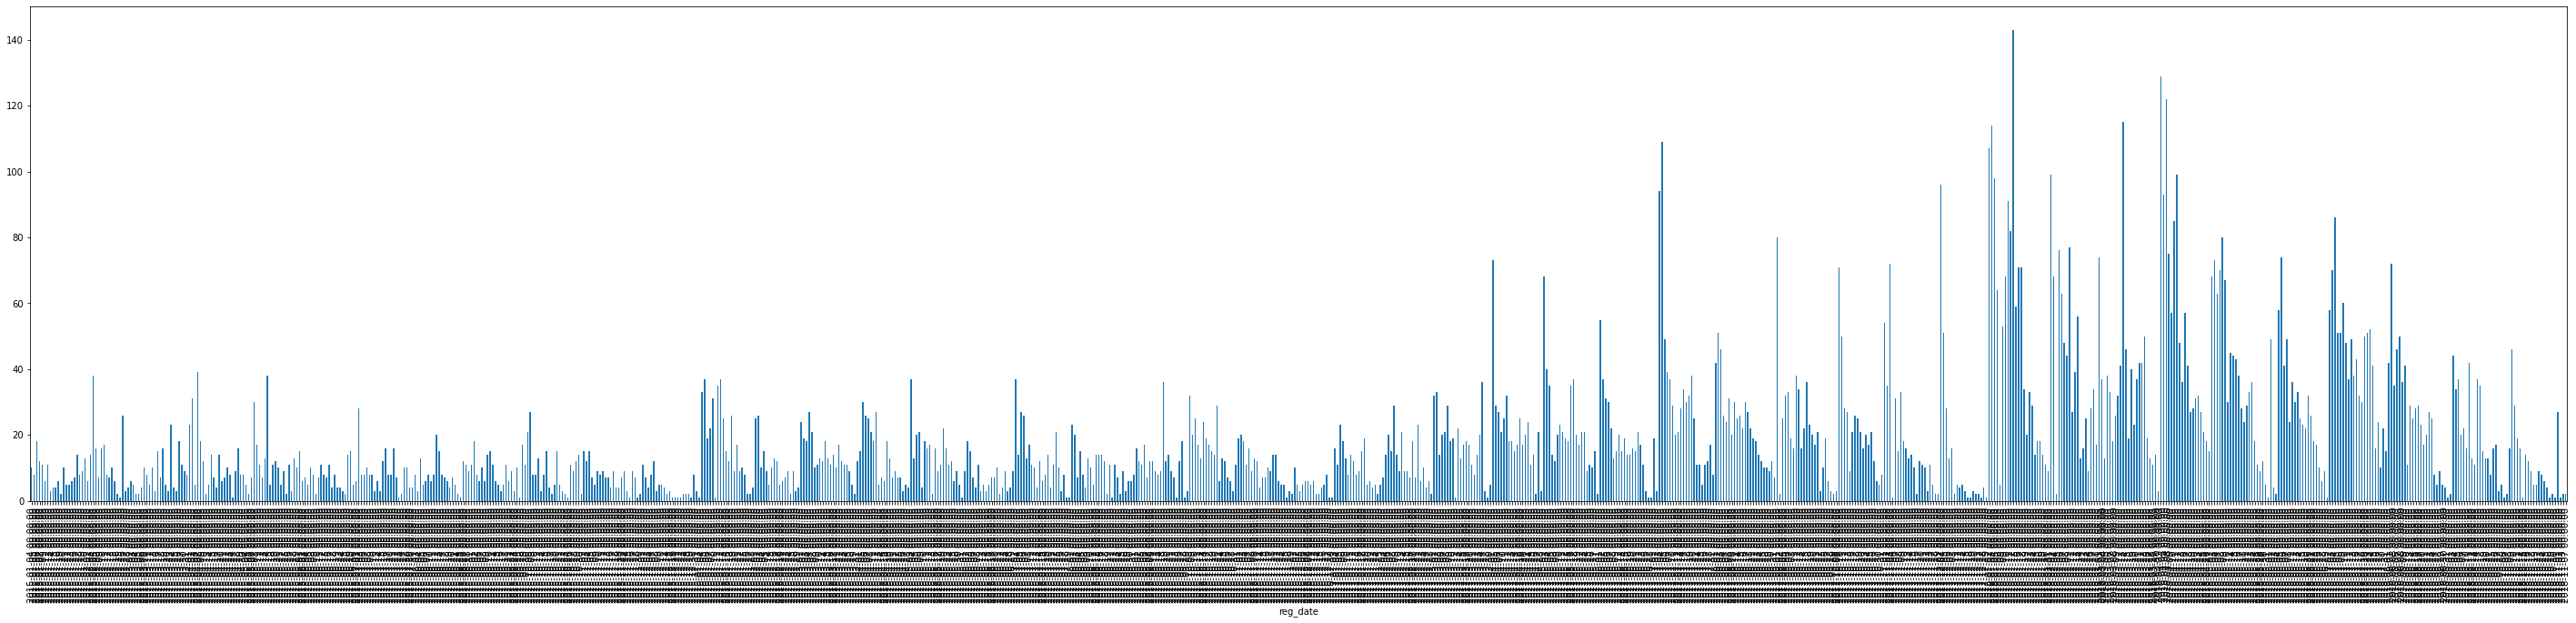

In [87]:
figsize=(50,10)
sh_sx_2017.groupby('reg_date')['X'].count().plot.bar(figsize=figsize)


In [88]:
sh_sx_2017.groupby('reg_date')['X'].count().sort_values(ascending=False).head(20)

reg_date
2018-01-12    143
2018-04-02    129
2018-04-04    122
2018-03-13    115
2018-01-03    114
2017-07-04    109
2018-01-02    107
2018-04-11     99
2018-02-01     99
2018-01-04     98
2017-12-01     96
2017-07-03     94
2018-04-03     93
2018-01-10     91
2018-07-04     86
2018-04-10     85
2018-01-11     82
2017-09-01     80
2018-05-08     80
2018-02-09     77
Name: X, dtype: int64

In [89]:
date = pd.DataFrame(sh_sx_2017.groupby('reg_date')['X'].count())
date.reset_index(inplace = True)
date.rename(columns = {'X':'Count'}, inplace=True)
date.head(10)

,reg_date,Count
0,2015-01-04,10
1,2015-01-05,8
2,2015-01-06,18
3,2015-01-07,12
4,2015-01-08,11
5,2015-01-09,6
6,2015-01-12,11
7,2015-01-13,3
8,2015-01-14,4
9,2015-01-15,4


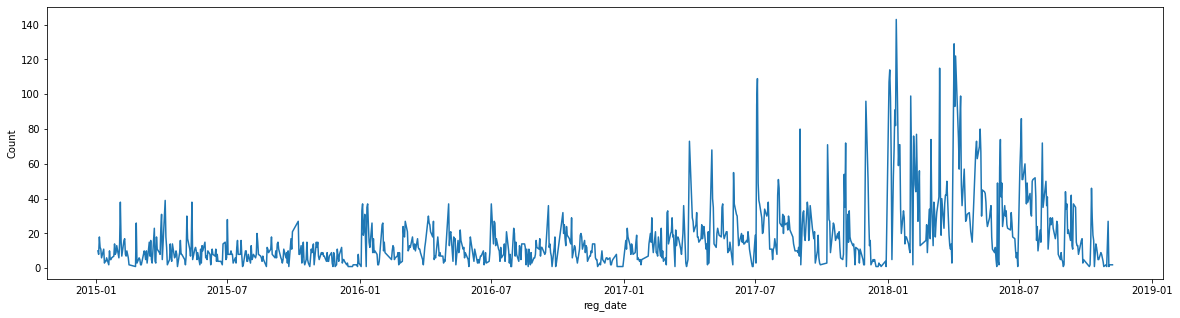

In [138]:
plt.figure(figsize=(20,5))
ax = sns.lineplot(x = "reg_date", y= "Count", data=date)

# Check the str contains 

## 失信  ｜ 执行 ｜ 被执行 ｜  被执行人｜  强制执行

In [176]:
pd.DataFrame(sh_sx.groupby("disrupt_type_name")['iname'].count().sort_values(ascending=False)).reset_index().head(20)

,disrupt_type_name,iname
0,有履行能力而拒不履行生效法律文书确定义务,10065
1,其他有履行能力而拒不履行生效法律文书确定义务,5222
2,违反财产报告制度,1348
3,被执行人无正当理由拒不履行执行和解协议,637
4,"违反财产报告制度,其他有履行能力而拒不履行生效法律文书确定义务",347
5,其他规避执行,283
6,其他妨碍、抗拒执行,214
7,其它规避执行,128
8,"有履行能力而拒不履行生效法律文书确定义务,违反财产报告制度",122
9,有履行能力而拒不履行生效法律文书确定义务的,101


In [161]:
pd.DataFrame(sh_sx.groupby("performance")['iname'].count().sort_values(ascending=False)).reset_index()

,performance,iname
0,全部未履行,18494
1,部分未履行,310


In [163]:
pd.DataFrame(sh_sx.groupby("gist_unit")['iname'].count().sort_values(ascending=False)).reset_index().head(20)

,gist_unit,iname
0,上海市浦东新区人民法院,2931
1,上海市青浦区人民法院,2507
2,上海市松江区人民法院,2004
3,上海市嘉定区人民法院,1886
4,上海市奉贤区人民法院,1513
5,上海市宝山区人民法院,1201
6,上海市金山区人民法院,1024
7,上海市闵行区人民法院,986
8,区县劳动仲裁委员会,727
9,上海市静安区人民法院,714


In [165]:
pd.DataFrame(sh_sx.groupby("iname")['X'].count().sort_values(ascending=False)).reset_index().head(20)

,iname,X
0,新金仕堡体育发展（上海）有限公司,86
1,上海绿港购物广场有限公司,66
2,上海松江礼品城有限公司,59
3,上海台佳家具有限公司,47
4,上海钱桥华勋投资管理有限公司,45
5,上海千恩企业管理有限公司,41
6,上海昊宇机械有限公司,40
7,天会（上海）投资有限公司,38
8,上海鼎凡电工机械股份有限公司,37
9,上海誉丰实业（集团）有限公司,37


# @TODO 2 -- why duplicate 

In [199]:
sh_sx_str_shixin = sh_sx[
    (sh_sx.duty.str.contains("失信"))     # |  
#     (sh_sx.duty.str.contains("被执行"))  |
#     (sh_sx.duty.str.contains("失信执行")) |
#     (sh_sx.duty.str.contains("被执行人")) |
#     (sh_sx.duty.str.contains("强制执行")) |
#     (sh_sx.duty.str.contains("申请执行")) 
    
]

print(f'Only {len(sh_sx_str_shixin)} entries contains word token 失信')


Only 23 entries contains word token 失信


In [169]:
sh_sx_zhixin = sh_sx[
    (sh_sx.duty.str.contains("执行"))     # |  
#     (sh_sx.duty.str.contains("被执行"))  |
#     (sh_sx.duty.str.contains("失信执行")) |
#     (sh_sx.duty.str.contains("被执行人")) |
#     (sh_sx.duty.str.contains("强制执行")) |
#     (sh_sx.duty.str.contains("申请执行")) 
    
]
text_duty = sh_sx_zhixin.sample(10)
text_duty

,Unnamed: 0,X,shixin_id,iname,code_num,case_code,age,gender,gist_id,business_entity,court,area,reg_date,gist_unit,duty,performance,disrupt_type_name,publish_date
18227,76135,76135,124276406,北京一明时代技术服务有限公司上海青浦分公司,332374332,（2016）沪0118执05648号,0,COMPANY,青劳人仲2016办字第377号,徐明宽,上海市青浦区人民法院,上海,2016-08-17,上海市青浦区劳动人事争议仲裁委员会,被执行人应支付申请人2015年4月3日至11月10日未签劳动合同二倍工资差额人民币36787.80,全部未履行,其他有履行能力而拒不履行生效法律文书确定义务,2016-09-22
14569,64444,64444,116943812,上海大资源绿色食品发展有限公司,557409401,（2016）沪0101执01836号,0,COMPANY,（2015）黄浦民五（商）初字第9151号,周荣曼,上海市黄浦区人民法院,上海,2016-04-05,上海市黄浦区人民法院,要求被执行人归还借款等共计人民币4158275.4元。13817167363,全部未履行,其他有履行能力而拒不履行生效法律文书确定义务,2017-04-13
3229,19857,19857,5910947,上海睿风自行车有限公司,065951026,（2015）闵执字第10368号,0,COMPANY,（2015）闵民二（商）初字第968号,姜玉兰,上海市闵行区人民法院,上海,2015-11-04,上海市闵行区人民法院,"被执行人支付申请执行人赵犇投资款及杂费人民币260,000元，并偿付申请执行人以人民币260...",全部未履行,其他有履行能力而拒不履行生效法律文书确定义务,2016-12-05
20361,82554,82554,126176436,徐州市东盛印务有限公司,741312204,（2016）沪0117执07013号,0,COMPANY,（2016）沪0117民初11507号,孙玉芬,上海市松江区人民法院,上海,2016-11-16,上海市松江区人民法院,"要求被执行人支付货款93,258元;逾期付款利息3,497.2元（以93258元为基数，自2...",全部未履行,"违反财产报告制度,其他有履行能力而拒不履行生效法律文书确定义务",2016-12-01
32256,123327,123327,701517788,绍兴拓普电子科技有限公司,069216491,（2017）沪0117执4575号,0,COMPANY,（2017）沪0117民初09671号,倪仁汉,上海市松江区人民法院,上海,2017-07-27,上海市松江区人民法院,"要求被执行人上海百川连接器有限公司偿还借款本金17,329,185.14元,利息79,398...",全部未履行,违反财产报告制度,2017-11-05
33378,127241,127241,701713690,上海科程精密模塑有限公司,558823698,（2017）沪0116执3号,0,COMPANY,（2016）沪0116民初09584号,吴勇强,上海市金山区人民法院,上海,2017-01-03,上海市金山区人民法院,一、被告上海科程精密模塑有限公司确认尚欠原告上海金山利民小额贷款有限公司借款本金人民币100...,全部未履行,有履行能力而拒不履行生效法律文书确定义务,2017-11-23
41142,150979,150979,703082491,上海鑫海马企业发展有限公司,9131011860****505A,（2018）沪0118执1162号,0,COMPANY,（2017）沪0118民初17255号,叶新荣,上海市青浦区人民法院,上海,2018-02-07,上海市青浦区人民法院,"一、被告上海鑫海马企业发展有限公司支付原告郭士涛货款807,367元及利息1万元，此款被告于...",全部未履行,有履行能力而拒不履行生效法律文书确定义务,2018-04-26
42985,156442,156442,703408868,上海芷涵投资管理有限公司,342081533,（2018）沪0117执2999号,0,COMPANY,（2018）沪0117民初01822号,陈乃梅,上海市松江区人民法院,上海,2018-05-02,上海市松江区人民法院,"要求被执行人上海芷涵投资管理有限公司返还履约保证金及进场费共计150,000元;被执行人陈乃...",全部未履行,有履行能力而拒不履行生效法律文书确定义务,2018-05-24
50026,176179,176179,704542627,潍坊城矿环保科技有限公司,064370457,（2018）沪0115执14511号,0,COMPANY,（2018）沪0115民初16127号,孙庆利,上海市浦东新区人民法院,上海,2018-07-13,上海市浦东新区人民法院,一、原告王盛尧与被告潍坊城矿环保科技有限公司、山东城矿环保集团有限公司、孙庆利、孙延波于20...,全部未履行,有履行能力而拒不履行生效法律文书确定义务,2018-09-14
34246,130115,130115,701862978,无锡百得包装材料有限公司,674885589,（2017）沪0115执23788号,0,COMPANY,(2017)沪0115民初27200号,龙伟俊,上海市浦东新区人民法院,上海,2017-10-09,上海市浦东新区人民法院,1、依法强制被申请人一向申请人支付编号为DY-BD-15045-FL融资租赁合同项下租金及留...,全部未履行,有履行能力而拒不履行生效法律文书确定义务,2017-12-06


In [189]:
sh_sx.iloc[48670]

Unnamed: 0                                                      172403
X                                                               172403
shixin_id                                                    704356715
iname                                                   上纽资产管理（上海）有限公司
code_num                                                     332696913
case_code                                            （2018）沪0114执4874号
age                                                                  0
gender                                                         COMPANY
gist_id                                            （2018）沪0114民初06300号
business_entity                                                     王俊
court                                                       上海市嘉定区人民法院
area                                                                上海
reg_date                                                    2018-08-07
gist_unit                                                   上海市嘉定区人民法院
duty  

In [139]:
text_duty.duty[48670]

'一、被告上纽资产管理（上海）有限公司应归还原告张显爱本金1,150,000元及期内利息169,625元，合计1,319,625元。具体支付日期如下：2018年7月30日之前归还300,000元，2019年1月25日之前归还350,000元，2019年9月30日之前归还669,625元；\n\u3000\u3000二、被告上纽资产管理（上海）有限公司应于2019年9月30日之前偿付原告张显爱逾期利息（以本金300,000元为基数，自2017年9月12日起至实际清偿之日止；以本金800,000元为基数，自2017年12月12日起至实际清偿之日止；以本金50,000元为基数，自2017年9月21日起至实际清偿之日止。上述均按照年利率6.5%计算）；\n\u3000\u3000三、被告上纽资产管理（上海）有限公司应于2019年9月30日之前支付原告张显爱律师费28,000元；\n\u3000\u3000四、如被告上纽资产管理（上海）有限公司届时未按上述第一、二、三项确定的期限履行付款义务的，则原告张显爱有权就被告上纽资产管理（上海）有限公司在本案中未履行的全部债务一并向法院申请强制执行；\n\u3000\u3000五、被告陈刚对被告上纽资产管理（上海）有限公司上述第一项付款义务中的本金800,000元承担连带清偿责任，被告陈刚在承担了保证责任后，有权向被告上纽资产管理（上海）有限公司追偿；\n\u3000\u3000六、被告王俊对被告上纽资产管理（上海）有限公司上述第一、二、三项付款义务承担连带清偿责任；\n\u3000\u3000七、案件受理费16,928元，减半收取计8,464元，由被告上纽资产管理（上海）有限公司、陈刚、王俊共同负担，被告上纽资产管理（上海）有限公司、陈刚、王俊负担之款应于2019年9月30日之前直接给付原告张显爱'

### Post processed

'一 上纽 资产 管理 应 归还 原告 张显 爱本 金元 及 期内 利息 合计 具体 日期 如下 之前 归还 之前 归还 之前 归还 元二 上纽 资产 管理 应 于 之前 偿付 原告 张显 爱 逾期 利息 以本 金元 为 基数 自 起 至 实际 清偿 以本 金元 为 基数 自 起 至 实际 清偿 以本 金元 为 基数 自 起 至 实际 清偿 上述 均 按照 计算 三 上纽 资产 管理 应 于 之前 原告 张显 爱 元四如 上纽 资产 管理 届时 未 按 上述 三项 确定 的 期限 履行 付款 义务 的 则 原告 张显 爱 有权 就 上纽 资产 管理 在 本案 中未 履行 的 全部 债务 一并 向 法院 申请 强制执行 五 陈刚 对 上纽 资产 管理 上述 付款 义务 中 的 本 金元 承担 连带 清偿 责任 陈刚 在 承担 了 保证 责任 后 有权 向 上纽 资产 管理 追偿 六 王俊 对 上纽 资产 管理 上述 三项 付款 义务 承担 连带 清偿 责任 七 案件 减半 收取 计元 由 上纽 资产 管理 陈刚 王俊 共同 负担 上纽 资产 管理 陈刚 王俊 负担 之款 应于 之前 直接 给付 原告 张显 爱 '

In [141]:
print(f'length of characters: {len(text_duty.duty[48670])}') 

length of characters: 711


In [142]:
puncts = [' ']
def clean_text(x):
    x=x.strip()
    for punct in puncts:
        x=x.replace(punct,'')
    return x


def is_chinese(xchar):
    if xchar>=u'\u4e00' and xchar<=u'\u9fa5':
        return True
    else:
        return False
    
def keep_chinese_text(x):
    out_str=''
    for i in x:
        if is_chinese(i):
            out_str=out_str+i
    return out_str

# def clean_text(text):
#     wordlist = jieba.lcut(text) 
#     wordlist = [w for w in wordlist if w not in stopwords and len(w)>2]
#     document =  " ".join(wordlist)
#     return document

def seg_sentence(sentence,stopwords):
    sentence_seged=jieba.cut(sentence)
    outstr=''
    for word in sentence_seged:
        if word not in stopwords:
                outstr+=word
                outstr+=" "
    return outstr

text_duty["duty"]=text_duty["duty"].apply(lambda x:clean_text(x))
text_duty["duty"]=text_duty["duty"].apply(lambda x:keep_chinese_text(x))
# text_duty["duty"]=text_duty["duty"].apply(lambda x:clean_text(x))
text_duty["duty"]=text_duty["duty"].apply(lambda x:seg_sentence(x,stopwords))

In [143]:
text_duty.duty[48670]

'一 上纽 资产 管理 应 归还 原告 张显 爱本 金元 及 期内 利息 合计 具体 日期 如下 之前 归还 之前 归还 之前 归还 元二 上纽 资产 管理 应 于 之前 偿付 原告 张显 爱 逾期 利息 以本 金元 为 基数 自 起 至 实际 清偿 以本 金元 为 基数 自 起 至 实际 清偿 以本 金元 为 基数 自 起 至 实际 清偿 上述 均 按照 计算 三 上纽 资产 管理 应 于 之前 原告 张显 爱 元四如 上纽 资产 管理 届时 未 按 上述 三项 确定 的 期限 履行 付款 义务 的 则 原告 张显 爱 有权 就 上纽 资产 管理 在 本案 中未 履行 的 全部 债务 一并 向 法院 申请 强制执行 五 陈刚 对 上纽 资产 管理 上述 付款 义务 中 的 本 金元 承担 连带 清偿 责任 陈刚 在 承担 了 保证 责任 后 有权 向 上纽 资产 管理 追偿 六 王俊 对 上纽 资产 管理 上述 三项 付款 义务 承担 连带 清偿 责任 七 案件 减半 收取 计元 由 上纽 资产 管理 陈刚 王俊 共同 负担 上纽 资产 管理 陈刚 王俊 负担 之款 应于 之前 直接 给付 原告 张显 爱 '

In [144]:
text_duty['duty'].str.contains("被执行人")

30618    False
46019    False
38754    False
47185    False
6245     False
29153    False
49380    False
44232    False
48670    False
47145     True
Name: duty, dtype: bool

# @TODO: Vectorize the tokens

## Token as feature -- lasso feature selection model

In [ ]:
# import sklean vecorization;
vectorizer = CountVectorizer()

In [125]:
sh_sx_blacklisted = sh_sx[
    (sh_sx.duty.str.contains("纳入"))     
]

sh_sx_blacklisted.duty.loc[14638]

'一、强制执行申请事项：^~^1、强制执行被申请人返还申请人借款本金人民币6136870元；自2016年3月10日起未支付的，应加倍支付迟延履行期间的债务利息；^~^2、强制执行被申请人支付申请人利息共计人民币2064907.44元；自2016年3月10日起未支付的，应加倍支付迟延履行期间的债务利息。^~^3、如被申请人一拒绝履行上述义务，强制执行被申请人二与申请人协议，以被申请人二持有的上海朗特环保科技有限公司股权进行折价，或拍卖、变卖该股权所得价款中的516300元有限受偿，不足部分由被申请人一清偿。^~^4、本案执行费用由被申请人承担。^~^二、请求限制被申请人张蓓高消费。^~^三、请求将被执行人张蓓纳入被执行人失信名单。'

In [184]:
sh_sx['duration'] = sh_sx.publish_date - sh_sx.reg_date
sh_sx[['iname','reg_date', 'publish_date', 'duration', ]].sample(20)

,iname,reg_date,publish_date,duration
12046,上海蔓延服饰有限公司,2015-04-14,2016-02-03,295 days
42049,上海唐朝酒店经营管理有限公司,2018-01-22,2018-05-10,108 days
27803,上海顺馨广告有限公司,2017-03-24,2017-08-31,160 days
29176,上海夏发贸易有限公司,2017-06-23,2017-09-15,84 days
7629,上海政金餐饮管理有限公司,2015-02-10,2015-04-27,76 days
40138,上海迄迪教育科技有限公司,2018-04-02,2018-04-16,14 days
38147,上海松江礼品城有限公司,2017-11-13,2018-03-12,119 days
25054,上海舜亭房地产开发有限公司,2016-10-13,2017-07-04,264 days
31549,上海汇洋机械制造有限公司,2016-02-16,2017-10-25,617 days
41097,上海胤煦实业有限公司,2018-04-03,2018-04-25,22 days


In [214]:
len(sh_sx[sh_sx.case_code.str.contains("执恢")])

1123

In [215]:
sh_sx[sh_sx.case_code.str.contains("执恢")][9049]

KeyError: 9049